In [1]:
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir = 'C:/Users/ASUS/Documents/asl 1-10/datasetASL-master/Dataset'
target_size = (100,100)
classes = 10

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.1,
                                   horizontal_flip=False,
                                   validation_split=0.2)
train_gen = train_datagen.flow_from_directory(data_dir,target_size=target_size,
                                              shuffle=True,
                                              batch_size=32,
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              subset='training')
val_gen = train_datagen.flow_from_directory(data_dir,target_size=target_size,
                                            batch_size=32,
                                            color_mode='rgb',
                                            class_mode='categorical',
                                            subset='validation')


Found 1653 images belonging to 10 classes.
Found 409 images belonging to 10 classes.


# Create Model


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3,strides=1, activation = 'relu',padding='same', input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size = (3,3),strides=2))

model.add(Conv2D(64, kernel_size = 3,strides=1, activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=2))

model.add(Conv2D(64, kernel_size = 3,strides=1, activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=2))

model.add(Conv2D(128, kernel_size = 3,strides=1, activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=1))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(classes, activation = 'softmax'))

model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0

In [5]:
history = model.fit_generator(train_gen,epochs = 10,validation_data=val_gen)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11152\3742114317.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,epochs = 10,validation_data=val_gen)


Epoch 1/10
52/52 [==============================] - 16s 292ms/step - loss: 2.2652 - accuracy: 0.1397 - val_loss: 1.9079 - val_accuracy: 0.3007
Epoch 2/10
52/52 [==============================] - 15s 280ms/step - loss: 0.8998 - accuracy: 0.6987 - val_loss: 1.0422 - val_accuracy: 0.6333
Epoch 3/10
52/52 [==============================] - 15s 281ms/step - loss: 0.3840 - accuracy: 0.8754 - val_loss: 0.8269 - val_accuracy: 0.7237
Epoch 4/10
52/52 [==============================] - 15s 288ms/step - loss: 0.2479 - accuracy: 0.9256 - val_loss: 0.7365 - val_accuracy: 0.7482
Epoch 5/10
52/52 [==============================] - 15s 280ms/step - loss: 0.1818 - accuracy: 0.9474 - val_loss: 0.7566 - val_accuracy: 0.7702
Epoch 6/10
52/52 [==============================] - 15s 280ms/step - loss: 0.1784 - accuracy: 0.9443 - val_loss: 0.6316 - val_accuracy: 0.7897
Epoch 7/10
52/52 [==============================] - 14s 278ms/step - loss: 0.0997 - accuracy: 0.9649 - val_loss: 0.6069 - val_accuracy: 0.8240

In [6]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("model saved")

model saved


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


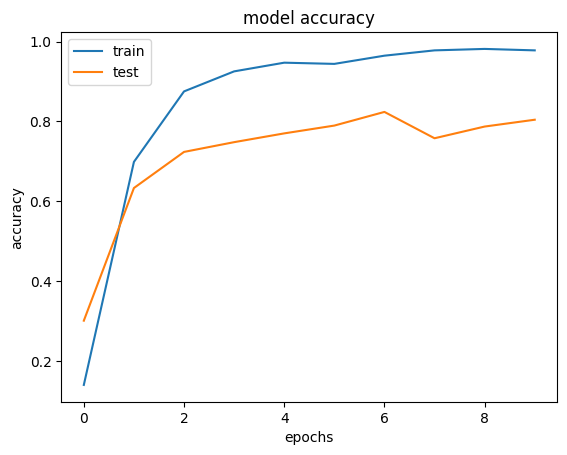

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [9]:
model_json = model.to_json()
with open("model.json","w") as file:
    file.write(model_json)
model.save_weights("model.h5")
print("model saved")

model saved


In [15]:
from keras.models import model_from_json
json_file =open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

load_model = model_from_json(loaded_model_json)
load_model.load_weights("C:/Users/ASUS/Documents/asl 1-10/src/model.h5")
print("LOADED!!")

LOADED!!


In [29]:
from tensorflow.keras.models import model_from_json
import numpy as np
import cv2

# Save model architecture to JSON file and weights to HDF5 file
model_json = model.to_json()
with open("model.json", "w") as file:
    file.write(model_json)
model.save_weights("model.h5")
print("Model saved")

# Load model architecture from JSON file and load weights
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Model loaded")

# Read and preprocess the image
image = cv2.imread("C:/Users/ASUS/Documents/asl 1-10/datasetASL-master/Examples/example_9.JPG")
image = cv2.resize(image, (100, 100))
image = np.reshape(image, [1, 100, 100, 3])

# Make predictions
predictions = loaded_model.predict(image)

# Get the predicted class
predicted_class = np.argmax(predictions)

print("Predicted class: ", predicted_class)


Model saved
Model loaded
1/1 [==============================] - 0s 66ms/step
Predicted class:  9
